# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [163]:
#1
url = "https://raw.githubusercontent.com/mrochella/datamining/refs/heads/main/penguins_size.csv"

df = pd.read_csv(url)
df.sample(10)
# Showing random 10 rows of the data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.
311,Gentoo,Biscoe,52.2,17.1,228.0,5400.0,MALE
198,Chinstrap,Dream,50.1,17.9,190.0,3400.0,FEMALE
110,Adelie,Biscoe,38.1,16.5,198.0,3825.0,FEMALE
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE
124,Adelie,Torgersen,35.2,15.9,186.0,3050.0,FEMALE
285,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,MALE
261,Gentoo,Biscoe,49.6,16.0,225.0,5700.0,MALE
52,Adelie,Biscoe,35.0,17.9,190.0,3450.0,FEMALE
213,Chinstrap,Dream,46.8,16.5,189.0,3650.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [164]:
#2

df.info()
# The dataset consists of 344 entries, with 7 columns capturing various details related to biological observations, the columns include species, island, culmen length, culmen depth, flipper length, body mass, and sex.
# While the data for species and island are complete, the measurements for culmen length, culmen depth, flipper length, and body mass have 2 missing entries each, resulting in 342 non-null values for these attributes.
# The sex column has more missing data, with 10 entries unaccounted for, leaving 334 non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [165]:
#3
description = df.describe()

description
# The code calculates the count of non-null entries, the mean (average) values, standard deviation (showing how spread out the data is), and the minimum, maximum, and quartiles (25%, 50%, 75%).
# Moderate variability is present in culmen length and flipper length, while culmen depth shows more consistency.
# Body mass has the highest variability, which may indicate significant differences in the physical characteristics of the subjects (possibly different species or populations).

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [166]:
#4
species_counts = df['species'].value_counts(dropna=False)
island_counts = df['island'].value_counts(dropna=False)
sex_counts = df['sex'].value_counts(dropna=False)

print(species_counts)
print(island_counts)
print(sex_counts)
# Checks every columns and then print its value count

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [167]:
#5
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

df.isnull().sum()
# Fills the missing values with mean and mode values
# Checks whether there is still a null value in each column

<ipython-input-167-5bb4372b7d09>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
<ipython-input-167-5bb4372b7d09>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


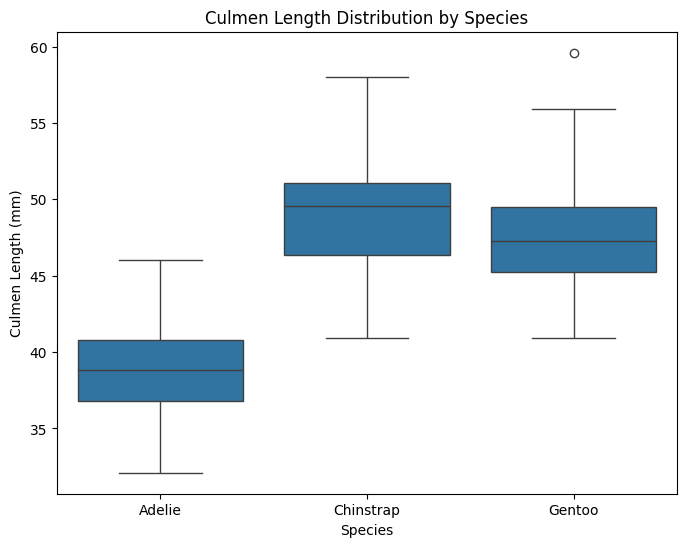

In [168]:
#6
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='culmen_length_mm', data=df)

plt.title('Culmen Length Distribution by Species')
plt.ylabel('Culmen Length (mm)')
plt.xlabel('Species')

plt.show()
# The box plot provides insights into the distribution of culmen lengths for each species. It shows the median, quartiles, and potential outliers.
# It also allows you to compare the range and variability of culmen lengths across different species, helping to understand how measurements vary within each species.

7. Check unique value of our target variable

In [169]:
#7
unique_species = df['species'].unique()

print(unique_species)
# Checks unique values in the species column

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [170]:
#8
label_encoder = LabelEncoder()

df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])

df.sample(n = 5)
# Encode the categorical columns (island and sex) using label encoder

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
194,Chinstrap,1,50.9,19.1,196.0,3550.0,2
82,Adelie,2,36.7,18.8,187.0,3800.0,1
175,Chinstrap,1,50.6,19.4,193.0,3800.0,2
135,Adelie,1,41.1,17.5,190.0,3900.0,2
26,Adelie,0,40.6,18.6,183.0,3550.0,2


9. encode the target column and display the results

In [171]:
#9
df['species'] = label_encoder.fit_transform(df['species'])

df.sample(n = 5)
# Encode the target column (which is the species column) using label encoder

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
69,0,2,41.8,19.4,198.0,4450.0,2
285,2,0,49.8,16.8,230.0,5700.0,2
152,1,1,46.5,17.9,192.0,3500.0,1
73,0,2,45.8,18.9,197.0,4150.0,2
243,2,0,46.3,15.8,215.0,5050.0,2


10. create a heatmap to see the correlation and explain the conclusion

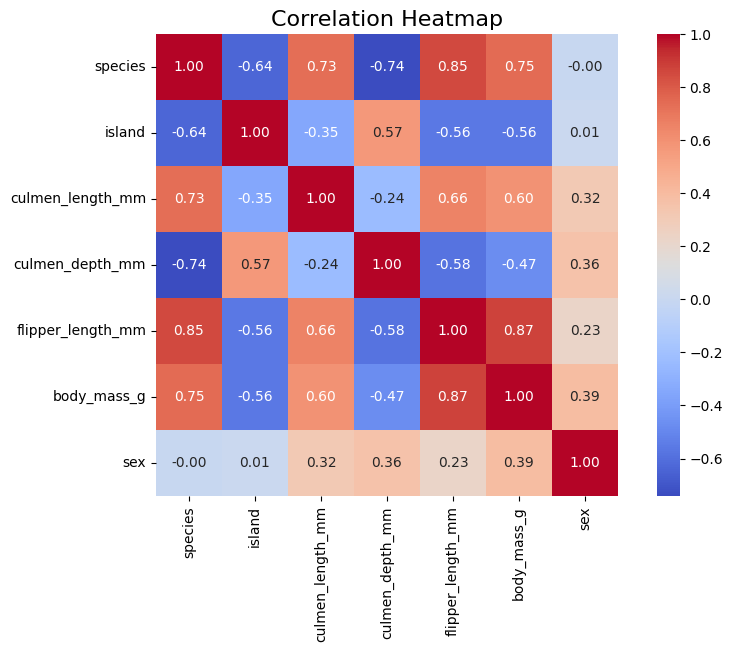

In [172]:
#10
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)

plt.show()
# As we can see from the correlation heatmap, the feature most strongly correlated with the penguin species is the flipper length (flipper_length_mm).
# Additionally, culmen length and body mass show a high positive correlation with species as well.
# Conversely, the island and culmen depth have a strong negative correlation with species.
# Lastly, the gender has the weakest correlation, indicating that it has little to no impact on determining the penguin species.

## Machine Learning

1. Splitting X and y

In [173]:
#1
X = df.drop(['species'], axis = 1)
y = df['species']

# While 'X' is the predicting variable
# 'y' is the predicted variable

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [174]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Using train test split for data training and testing
# With the test size of 20%

In [175]:
#3
X_train.shape, X_test.shape

# 'shape' method is used to check how many rows and columns are associated with each train or test data

((275, 6), (69, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [176]:
#Criterion Entropy

#a
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [177]:
#b
y_pred_en = clf_en.predict(X_test)

# Predicting the 'X_test' using Criterion Entropy

In [178]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

# Shows the accuracy score based on the y_test and y_pred
# Resulting with a high 92 percent accuracy

Model accuracy score with criterion entropy: 0.9275


In [179]:
#d
y_train_en = clf_en.predict(X_train)
test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only less than 5%, so we conclude that the model is well-fitted

Testing set score: 0.9275
Training set score: 0.9709


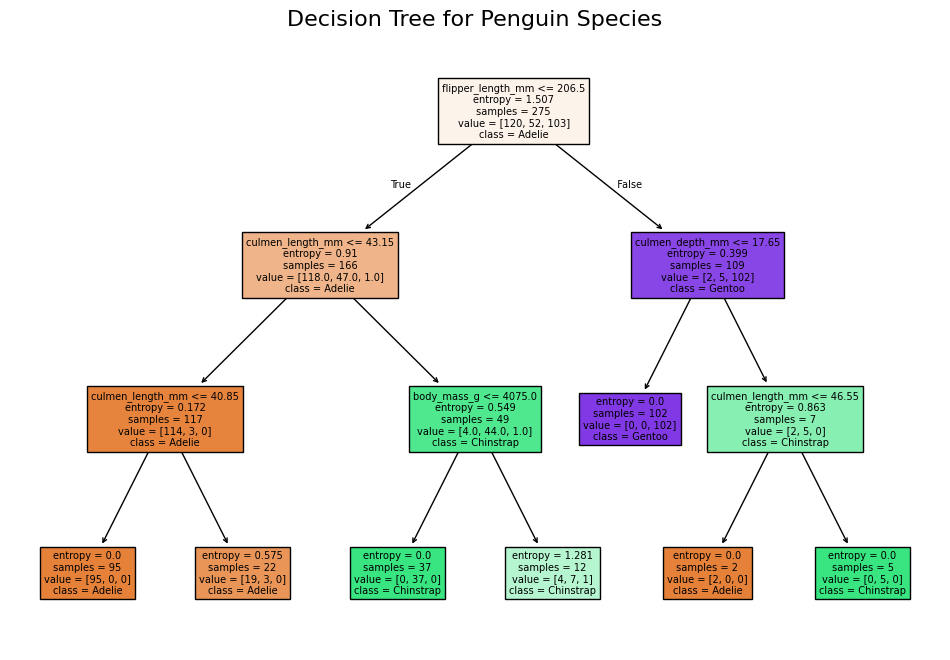

In [180]:
#e
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True)
plt.title('Decision Tree for Penguin Species', fontsize=16)

plt.show()
# Creates the decision tree of the Criterion Entropy algorithm using matplotlib

2. Criterion Gini index

In [181]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Gini

DecisionTreeClassifier(max_depth=3, random_state=0)

In [182]:
#b
y_pred_gini = clf_gini.predict(X_test)

# Predicts the 'X_test' using Criterion Gini

In [183]:
#c
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

# Shows the accuracy score based on the 'y_test' and 'y_pred'
# Resulting with a high 92 percent accuracy

Model accuracy score with criterion gini index: 0.9275


In [184]:
#d
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only less than 5%, so we conclude that the model is well-fitted

Testing set score: 0.9275
Training set score: 0.9709


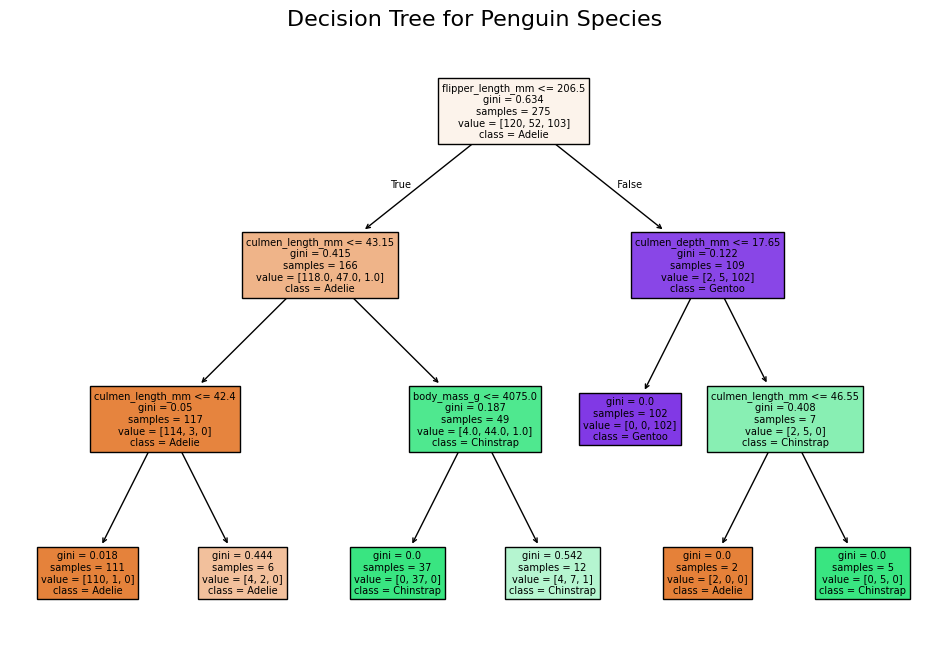

In [185]:
#e
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True)
plt.title('Decision Tree for Penguin Species', fontsize=16)

plt.show()
# Creates the decision tree of the Criterion gini algorithm using matplotlib

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [186]:
#f
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:\n", conf_matrix_en)
print("\nConfusion Matrix Gini Index:\n", conf_matrix_gini)
# Prints the confusion matrix of Criterion Entropy and Criterion Gini

Confusion Matrix Entropy:
 [[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]

Confusion Matrix Gini Index:
 [[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]


In [187]:
#g
class_report_en = classification_report(y_test, y_pred_en)
class_report_gini = classification_report(y_test, y_pred_gini)

print("Classification Report Entropy: \n", class_report_en)
print("\nClassification Report Gini Index: \n", class_report_gini)
# Prints the classification report of Criterion Entropy and Criterion Gini

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69


Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69



In [188]:
#h

# Result : Both Decision Tree models, using Entropy and Gini Index as splitting criteria, exhibit strong classification performance, achieving an overall accuracy of 93% in predicting penguin species.
# The precision, recall, and F1-scores for each species class are similar across both models, demonstrating their effectiveness in handling the dataset.
# Specifically, class 2 (Gentoo species) achieves perfect precision and high recall, suggesting that this species is easily distinguishable.
# However, attention is needed for class 1, which shows lower precision, indicating a higher likelihood of misclassification

# Conclusion : Both models produce identical precision, recall, and F1-scores for all classes, indicating similar predictive capabilities.
# Since the Entropy and Gini Index models deliver equivalent performance, the choice between them may depend on factors such as interpretability and computational efficiency.
# The Gini Index is generally faster to compute, making it a better option when model training time is a priority.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [189]:
#a
nb = GaussianNB()
nb.fit(X_train, y_train)
# Modelling using Naive Bayes Classifier

GaussianNB()

In [190]:
#b
y_pred_nb = nb.predict(X_test)
# Predicts the 'X_test' using the Naive Bayes Classifier model

In [191]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Model accuracy score: {accuracy_nb:.4f}")

#d
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Confusion Matrix:\n", conf_matrix_nb)
# Prints accuracy score and confusion matrix of the Naive Bayes Classifier model
# It shows a high 97% accuracy.

Model accuracy score: 0.9710
Confusion Matrix:
 [[31  1  0]
 [ 1 15  0]
 [ 0  0 21]]


In [192]:
#e
class_report_nb = classification_report(y_test, y_pred_nb)

print("Classification Report: \n", class_report_nb)
# Classification report of the Naive Bayes Classifier
# It shows the precision, recall, f1-score, and support values of the model.

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [193]:
#f

# Result : The model shows outstanding performance in classifying penguin species, achieving a remarkable overall accuracy of 97%.
# It maintains high precision and recall across all species, with a perfect recall of 1.00 for class 2, indicating that it accurately identifies true instances of this species.
# The consistently high F1-scores further demonstrate the model's reliability in minimizing misclassification errors.

# Conclusion : This model is highly effective for real-world applications in species identification and ecological research.
# To maintain its accuracy over time, it is important to regularly conduct cross-validation and monitor its performance with new datasets.
# Additionally, analyzing feature importance and experimenting with other algorithms may offer further insights and potential improvements.

Good Luck :)